**EJERCICIO 2**:Realiza las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub  PRE-PROCESSING-FECHA con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.

* `El resultado final debe ser un dataframe con las variables de nombre de la película , año y género.  ¡También es importante quedarse con un solo género para cada película!`


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Leer el archivo .dat usando pandas
movies = pd.read_csv('movies.dat', sep='::', header=None, engine='python', encoding='ISO-8859-1')

In [9]:
movies.columns = ['MovieID', 'Titulo', 'Generos']
movies.head()

,MovieID,Titulo,Generos
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


**Descripción**: Una simple inspección visual en el fichero nos permite saber que hace falta una limpieza ya que las columnas tienen información compuesta, por ejemplo la columna 1 tiene el nombre de la pelicula y el año (supondremos año de estreno), mientras que la columna 2 tiene el genero de la pelicula, pero algunas peliculas pueden pertenecer a mas de un genero.

In [3]:
#Extraemos el año de la pelicula
movies['Año'] = movies['Titulo'].str.extract(r'\((\d{4})\)')

#quedamos solo con el titulo de la pelicula
movies['Titulo'] = movies['Titulo'].str.extract(r'(.*) \(\d{4}\)')[0]

#Quedamos con un solo género por película
movies['Genero'] = movies['Generos'].str.split('|').str[0]

# Creamos un dataframe final con solo las columnas requeridas
final_movies = movies[['Titulo', 'Año', 'Genero']]

In [4]:
final_movies 

,Titulo,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


**EJERCICIO 3**: Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset " movies.dat " del ejercicio anterior?

Realiza una o dos representaciones gráficas y justifica tu elección.

**Respuesta**: Seria interesante saber por ejemplo, la evolucion del estreno de peliculas por año o ¿Cuantas peliculas de cada genero se estrenaron en cada año?.

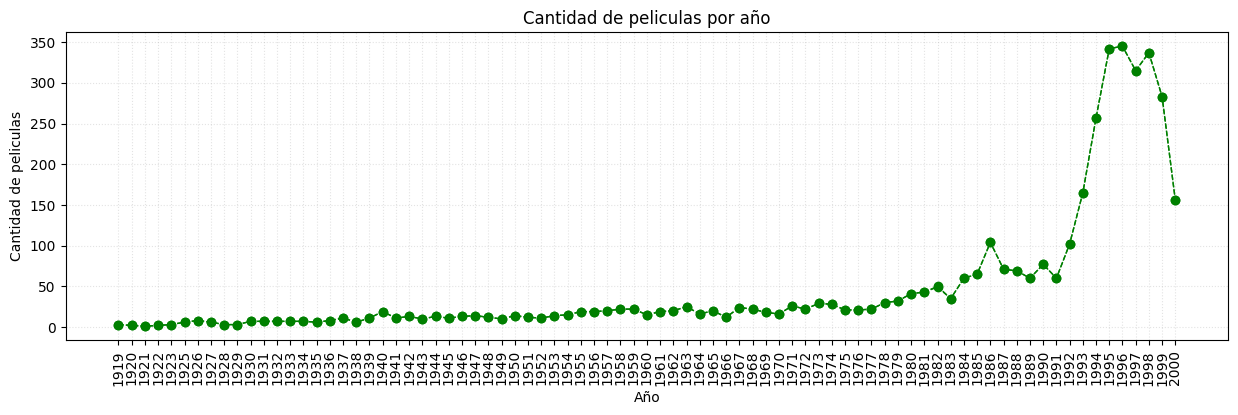

In [29]:
#Mostramos un grafico de linea para averiguar la evolucion de peliculas por año
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(final_movies.groupby('Año').count(), color='green', marker='o', linestyle='dashed', linewidth=1, markersize=6)
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de peliculas')
ax.set_title('Cantidad de peliculas por año')
plt.xticks(rotation=90)
ax.grid(True, linestyle=':', alpha=0.35)
plt.show()

**Descripción**: La grafica muestra una serie de tiempo de la cantidad de peliculas que se estrenaron cada año desde 1919 al 2000. Se observa una tendencia creciente en la cantidad de peliculas estrenadas cada año, con un pico en el año 1986 y una caida en el año 1987. Luego de 1991 se observa un crecimiento exponencial en la cantidad de peliculas estrenadas cada año hasta la caida en el año 2000.

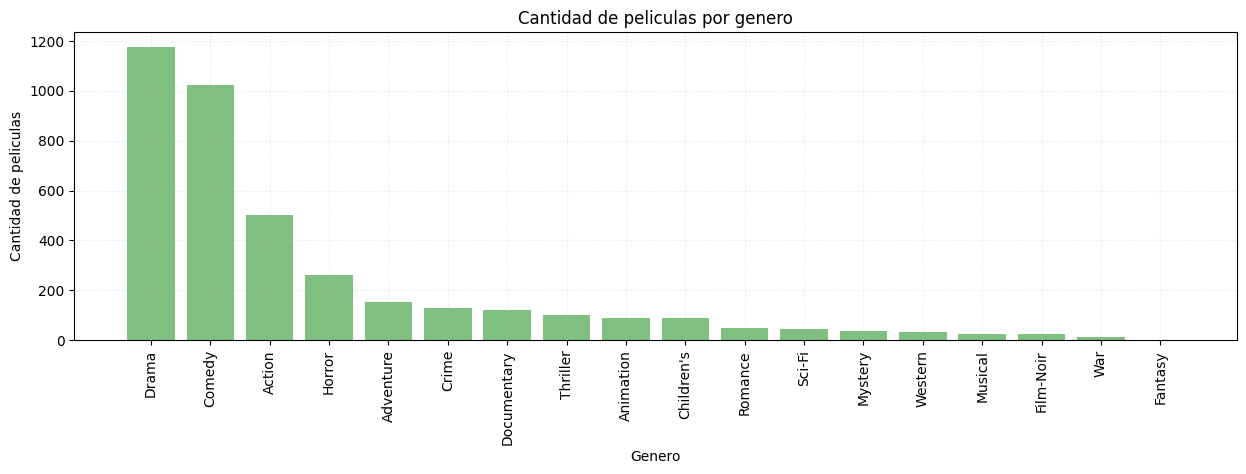

In [30]:
#Mostramos un grafico de barras para averiguar el genero con mas peliculas
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

ax.bar(final_movies.groupby('Genero').count().sort_values(by='Titulo', ascending=False).index, final_movies.groupby('Genero').count().sort_values(by='Titulo', ascending=False)['Titulo'], color='green', alpha=0.5)
ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad de peliculas')
ax.set_title('Cantidad de peliculas por genero')
plt.xticks(rotation=90)
ax.grid(True, linestyle=':', alpha=0.35)
plt.show()

**Descripción**: La grafica de barras muestra la cantidad de peliculas por genero. Se observa que el genero Drama es el mas popular, seguido por el genero Comedy y el genero Action. Los generos menos populares son Film-Noir, War y Fantasy. 

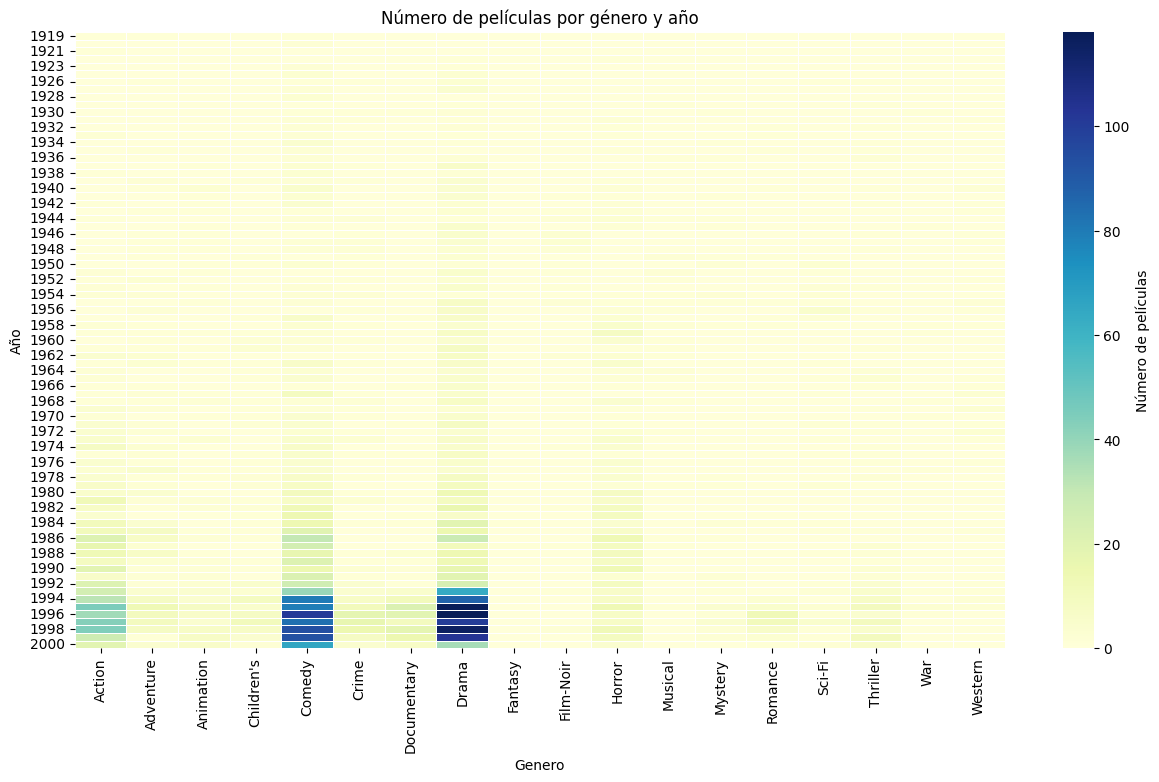

In [40]:
#Mapa de calor del genero preferido por año
#Creamos un dataframe con la cantidad de peliculas por año y genero
pivot_table = final_movies.groupby(['Año', 'Genero']).size().unstack().fillna(0)

plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt='g', linewidths=.5)
plt.title('Número de películas por género y año')
cbar = heatmap.collections[0].colorbar
cbar.set_label('Número de películas')
plt.show()

**Descripción**: La imagen muestra un mapa de calor de la cantidad de peliculas por genero y año. Se observa que el genero Drama, Comedy y Action son los mas populares durante los años 94 al 99. 